In [147]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    roc_curve
)

# To impute missing values
from sklearn.impute import KNNImputer

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

# Problem Statement:

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance


In [149]:
data = pd.read_csv("BankChurners.csv")
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
data.sample(n=10)

There are 10127 rows and 21 columns.


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498              36  ...                       3                      2   
9013              32  ...                       3                      3   
2053              31  ...                       3                      2   
3211              32  ...                       3                      4   
5559              28  ...                       2                      4   
6106              42  ...                       1                      2   
4150              40  ...                       3                      2   
2205              27  ...                       2                      4   
4145              31  ...                       3                      3   
5324              46  ...                       4                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6498        2570.0                 2107            463.0   
9013        2609.0                 1259           1350.0   
2053        9871.0                 1061           8810.0   
3211       34516.0                 2517          31999.0   
5559        1614.0                    0           1614.0   
6106       34516.0                 2488          32028.0   
4150        1625.0                    0           1625.0   
2205        5535.0                 1276           4259.0   
4145       25824.0                 1170          24654.0   
5324        1970.0                 1477            493.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498                 0.651             4058              83   
9013                 0.871             8677              96   
2053                 0.545             1683              34   
3211                 0.765             4228              83   
5559                 0.609             2437              46   
6106                 0.552             4401              87   
4150                 0.689             2314              43   
2205                 0.636             1764              38   
4145                 0.684             3101              73   
5324                 0.662             2493              44   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
6498                0.766                  0.820  
9013                0.627                  0.483  
2053                0.478                  0.107  
3211         

In [150]:
data.shape

(10127, 21)

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

education level and martical status are the only two that have missing values and require a further look.

In [152]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [153]:
data.duplicated().sum()

0

There are no duplicate rows

In [154]:
data.describe(include='all').T

count unique                top  freq         mean  \
CLIENTNUM                 10127    NaN                NaN   NaN  7.39178e+08   
Attrition_Flag            10127      2  Existing Customer  8500          NaN   
Customer_Age              10127    NaN                NaN   NaN       46.326   
Gender                    10127      2                  F  5358          NaN   
Dependent_count           10127    NaN                NaN   NaN       2.3462   
Education_Level            8608      6           Graduate  3128          NaN   
Marital_Status             9378      3            Married  4687          NaN   
Income_Category           10127      6     Less than $40K  3561          NaN   
Card_Category             10127      4               Blue  9436          NaN   
Months_on_book            10127    NaN                NaN   NaN      35.9284   
Total_Relationship_Count  10127    NaN                NaN   NaN      3.81258   
Months_Inactive_12_mon    10127    NaN                NaN   NaN      2.34117   
Contacts_Count_12_mon     10127    NaN                NaN   NaN      2.45532   
Credit_Limit              10127    NaN                NaN   NaN      8631.95   
Total_Revolving_Bal       10127    NaN                NaN   NaN      1162.81   
Avg_Open_To_Buy           10127    NaN                NaN   NaN      7469.14   
Total_Amt_Chng_Q4_Q1      10127    NaN                NaN   NaN     0.759941   
Total_Trans_Amt           10127    NaN                NaN   NaN      4404.09   
Total_Trans_Ct            10127    NaN                NaN   NaN      64.8587   
Total_Ct_Chng_Q4_Q1       10127    NaN                NaN   NaN     0.712222   
Avg_Utilization_Ratio     10127    NaN                NaN   NaN     0.274894   

                                  std          min          25%          50%  \
CLIENTNUM                 3.69038e+07  7.08082e+08  7.13037e+08  7.17926e+08   
Attrition_Flag                    NaN          NaN          NaN          NaN   
Customer_Age                  8.01681           26           41           46   
Gender                            NaN          NaN          NaN          NaN   
Dependent_count               1.29891            0            1            2   
Education_Level                   NaN          NaN          NaN          NaN   
Marital_Status                    NaN          NaN          NaN          NaN   
Income_Category                   NaN          NaN          NaN          NaN   
Card_Category                     NaN          NaN          NaN          NaN   
Months_on_book                7.98642           13           31           36   
Total_Relationship_Count      1.55441            1            3            4   
Months_Inactive_12_mon        1.01062            0            2            2   
Contacts_Count_12_mon         1.10623            0            2            2   
Credit_Limit                  9088.78       1438.3         2555         4549   
Total_Revolving_Bal           814.987            0          359         1276   
Avg_Open_To_Buy               9090.69            3       1324.5         3474   
Total_Amt_Chng_Q4_Q1         0.219207            0        0.631        0.736   
Total_Trans_Amt               3397.13          510       2155.5         3899   
Total_Trans_Ct                23.4726           10           45           67   
Total_Ct_Chng_Q4_Q1          0.238086            0        0.582        0.702   
Avg_Utilization_Ratio        0.275691            0        0.023        0.176   

                                  75%          max  
CLIENTNUM                 7.73144e+08  8.28343e+08  
Attrition_Flag                    NaN          NaN  
Customer_Age                       52           73  
Gender                            NaN          NaN  
Dependent_count                     3            5  
Education_Level                   NaN          NaN  
Marital_Status                    NaN          NaN  
Income_Category                   NaN          NaN  
Card_Category              

In [155]:
df =data.copy()
df.drop(['CLIENTNUM'],axis=1,inplace=True)

Dropping CLIENTNUM because it has no value

In [156]:
#Label encoding the target variable 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df[ 'Attrition_Flag'] = df[ 'Attrition_Flag'].replace({ 'Existing Customer': 0, 'Attrited Customer': 1})
df.sample(n=10)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
5212               1            51      F                2             NaN   
2349               0            38      F                4        Graduate   
2192               0            58      F                3   Post-Graduate   
4202               1            56      F                1        Graduate   
3872               0            51      M                2       Doctorate   
3240               0            49      F                2     High School   
6601               0            43      F                3   Post-Graduate   
9638               0            32      M                1             NaN   
7092               0            54      M                4      Uneducated   
1148               0            49      M                5             NaN   

     Marital_Status Income_Category Card_Category  Months_on_book  \
5212         Single  Less than $40K          Blue              43   
2349        Married     $40K - $60K          Blue              22   
2192         Single  Less than $40K          Blue              54   
4202         Single     $40K - $60K          Blue              37   
3872         Single     $40K - $60K          Blue              40   
3240        Married             abc          Blue              36   
6601        Married  Less than $40K          Blue              35   
9638         Single     $40K - $60K        Silver              16   
7092         Single    $80K - $120K          Blue              42   
1148         Single     $60K - $80K          Blue              36   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
5212                         5                       3                      2   
2349                         4                       3                      4   
2192                         4                       2                      3   
4202                         2                       4                      3   
3872                         4                       3                      3   
3240                         6                       2                      3   
6601                         5                       3                      3   
9638                         3                       3                      1   
7092                         5                       2                      2   
1148                         6                       1                      2   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
5212        3245.0                    0           3245.0   
2349        2997.0                 1969           1028.0   
2192        8886.0                    0           8886.0   
4202        2339.0                    0           2339.0   
3872        6492.0                  719           5773.0   
3240       15704.0                    0          15704.0   
6601        2435.0                 1595            840.0   
9638       17894.0                 2517          15377.0   
7092       11742.0                    0          11742.0   
1148        5159.0                 1532           3627.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
5212                 0.553             1977              29   
2349                 1.235             2807              60   
2192                 0.694             4148              79   
4202                 0.493             1542              45   
3872                 0.711             4828              78   
3240                 0.924             4253              91   
6601                 0.691             5268              88   
9638                 0.731            15305             111   
7092                 0.621             4053              70   
1148                 0.787             1826              37   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
5212                0.261                  0.000  
2349                0.714             

In [161]:
list(df.columns)

['Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [162]:
#abc is an unknown in income category.  For now I'm going to replace it with unknown as I will probably 
#use get dummys for modeling on this category.  
df.Income_Category=df.Income_Category.replace('abc', np.nan)

In [163]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create a boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

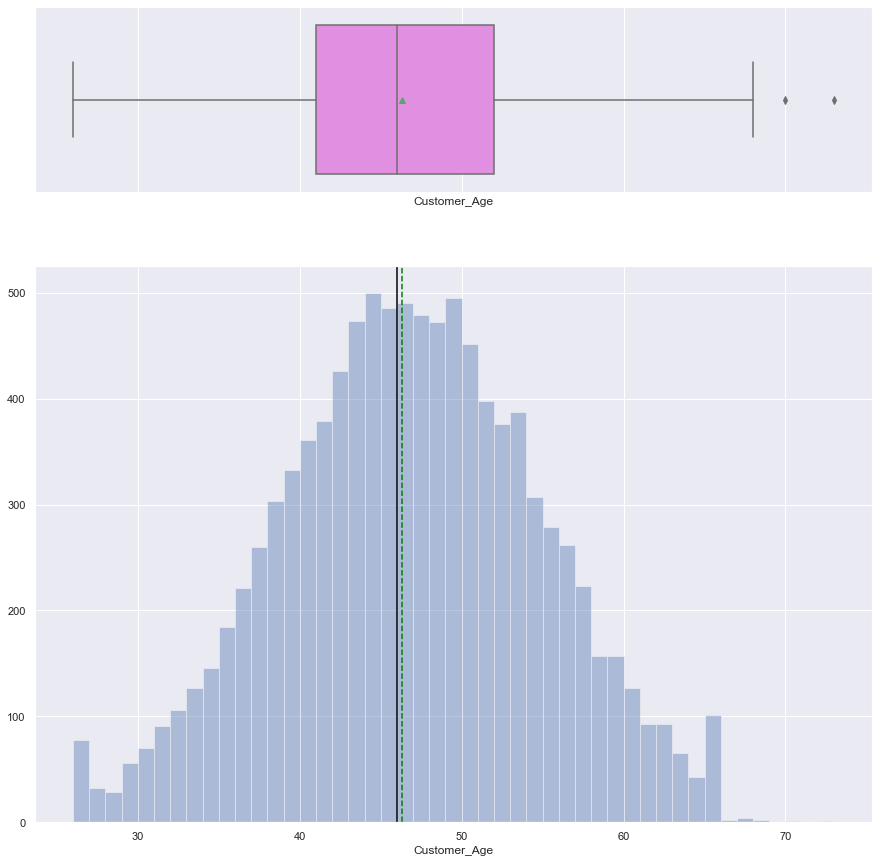

In [160]:
histogram_boxplot(df['Customer_Age'])


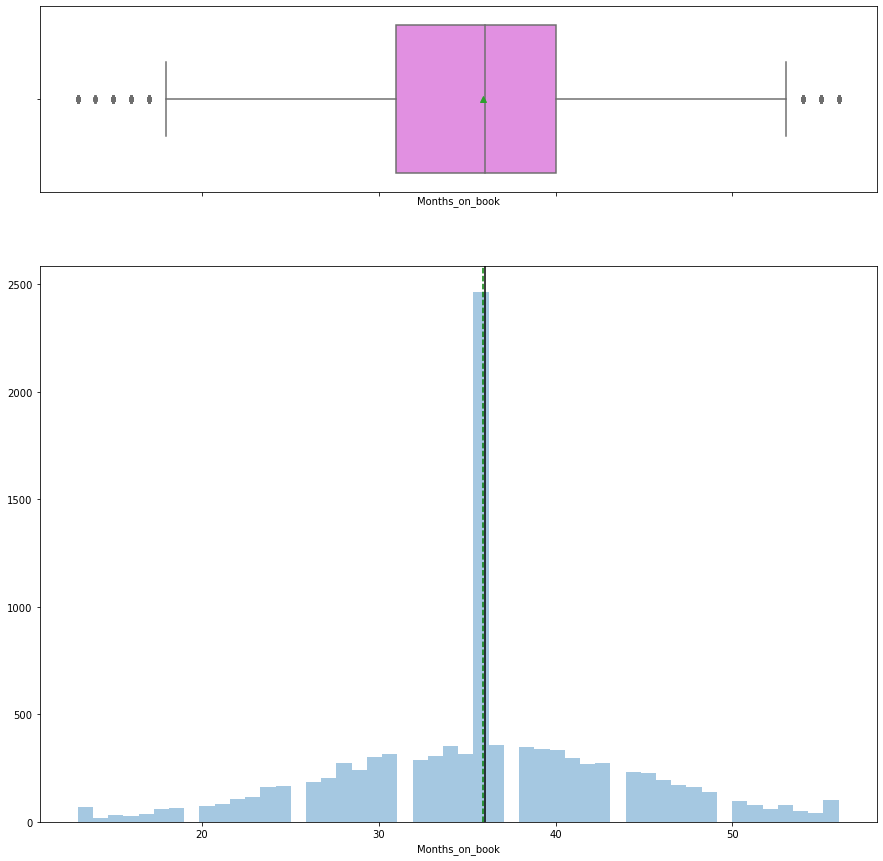

In [55]:
histogram_boxplot(df['Months_on_book'])

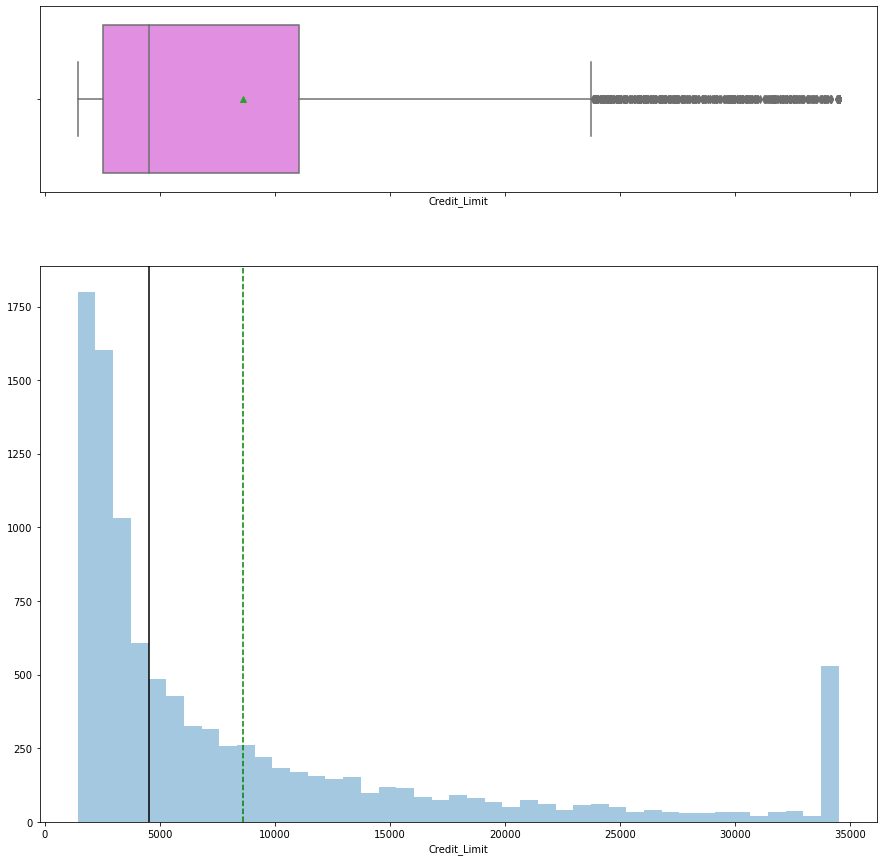

In [56]:
histogram_boxplot(df['Credit_Limit'])

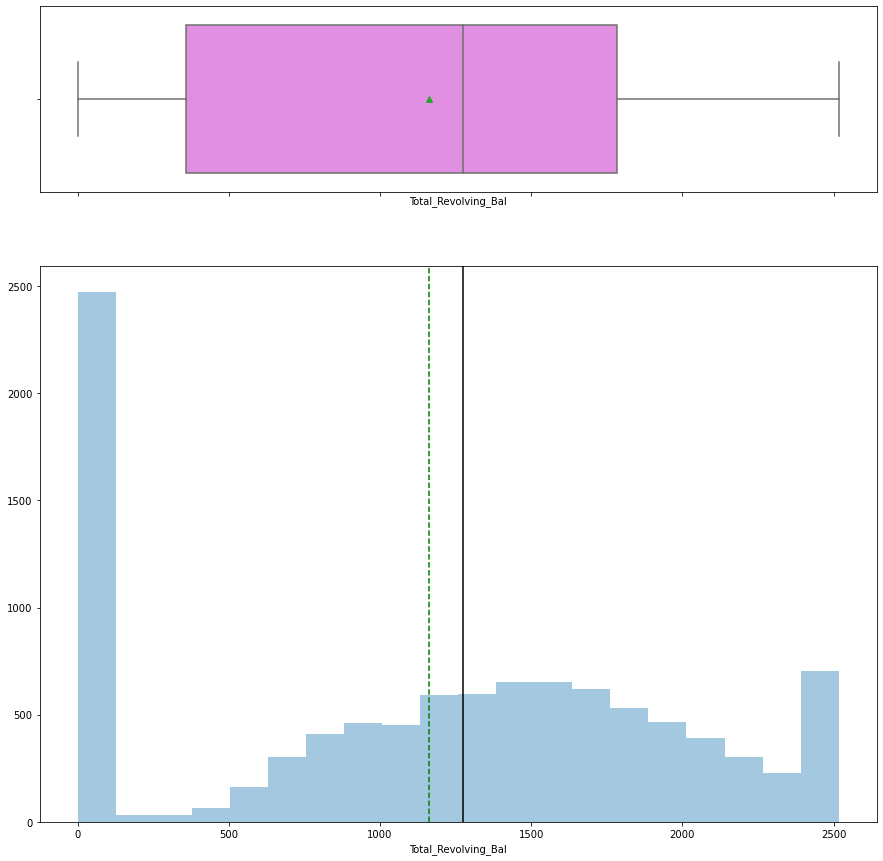

In [57]:
histogram_boxplot(df['Total_Revolving_Bal'])

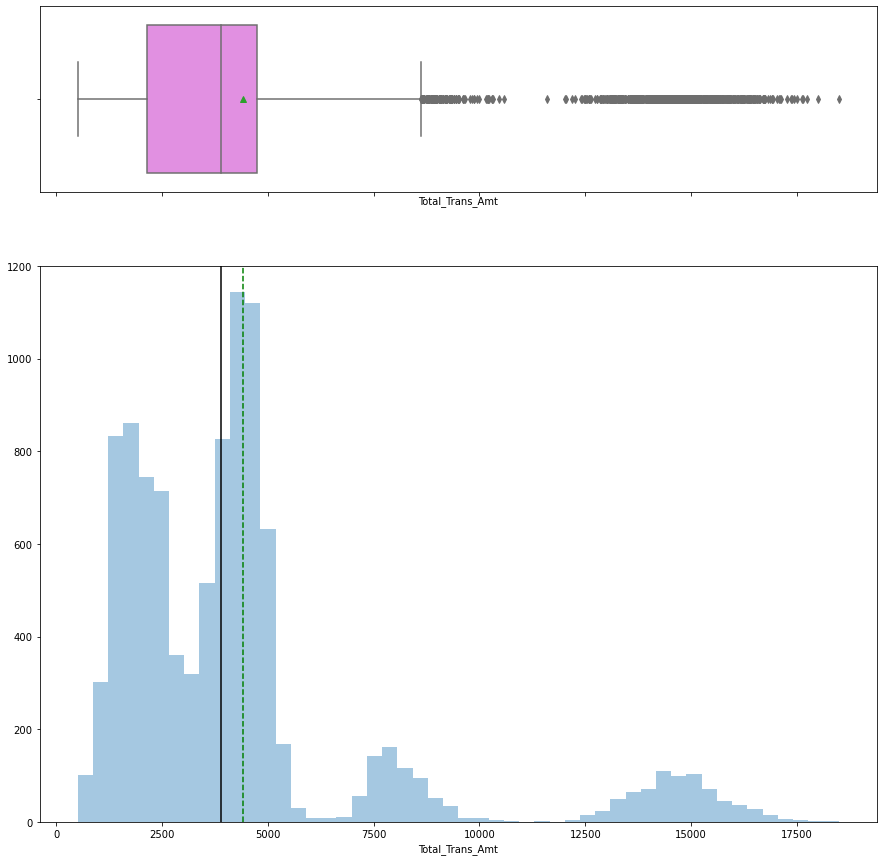

In [58]:
histogram_boxplot(df['Total_Trans_Amt'])

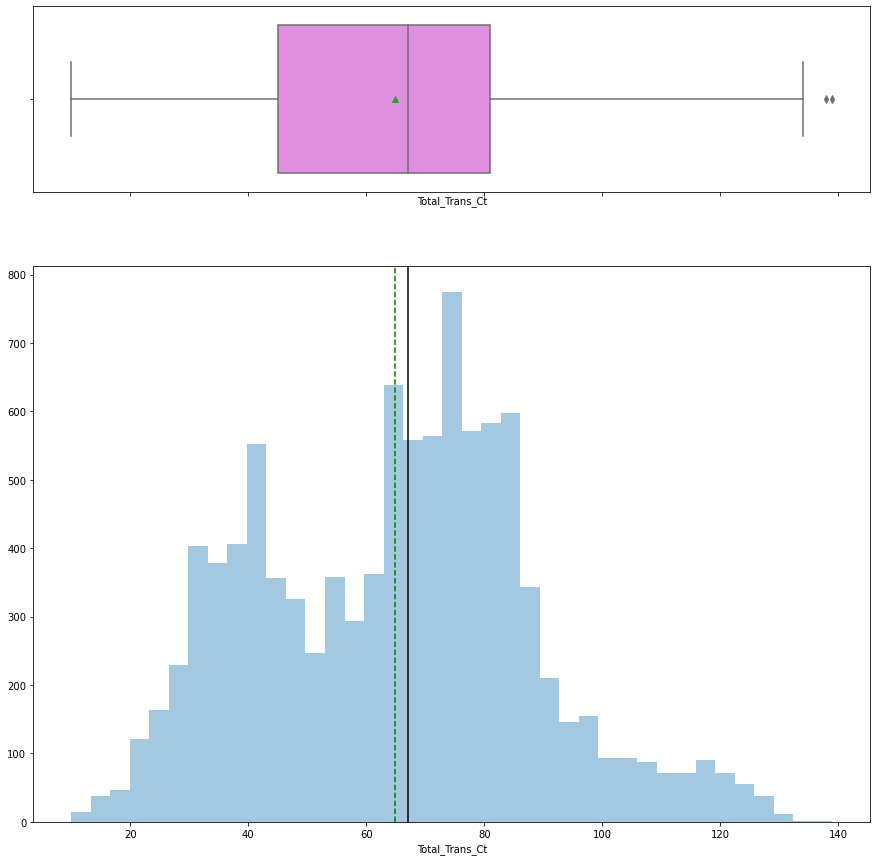

In [186]:
histogram_boxplot(df['Total_Trans_Ct'])


*Observations* 
- Customer Age is normally distributed.  The average age is 46 with the range being 26 to 73
- Months on book is a spike right in the middle.  
- Credit limit is right scewed with a spike on the high end
- Total revolving Balance has spikes on both ends but the one closer to zero should be normal as some people do not have balances
- Total Trans amount is right scewed as well
- Total Trans count appears normally distributed

In [67]:
def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=df, hue="Attrition_Flag")
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

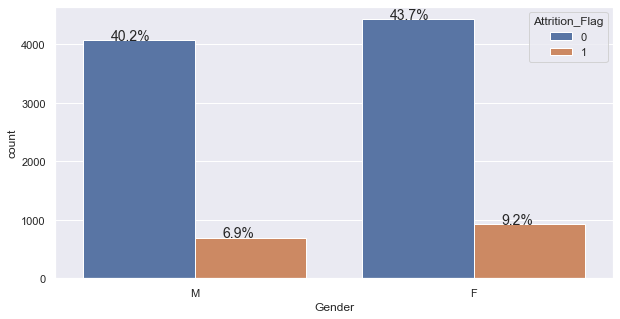

In [68]:
perc_on_bar(df.Gender)

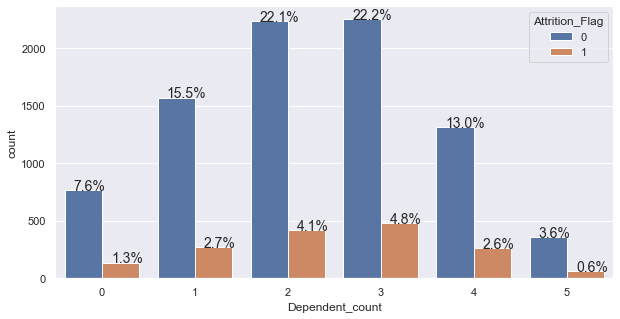

In [69]:
perc_on_bar(df.Dependent_count)

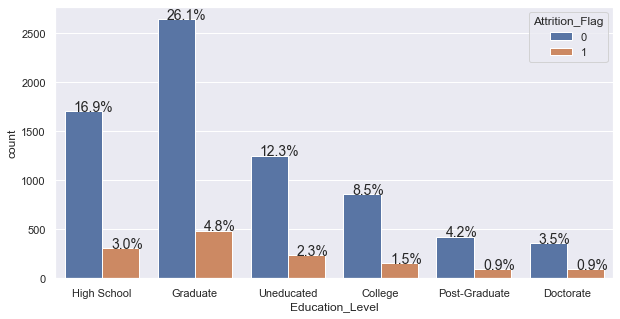

In [70]:
perc_on_bar(data.Education_Level)

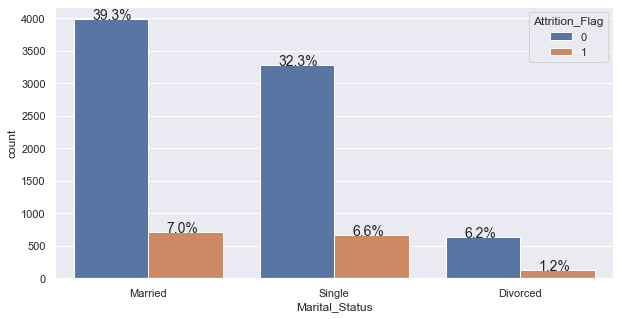

In [71]:
perc_on_bar(df.Marital_Status)

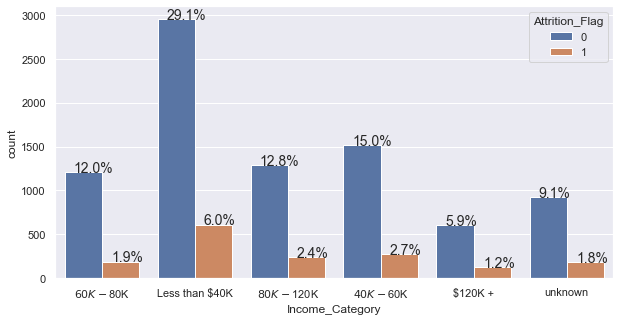

In [72]:
perc_on_bar(df.Income_Category)

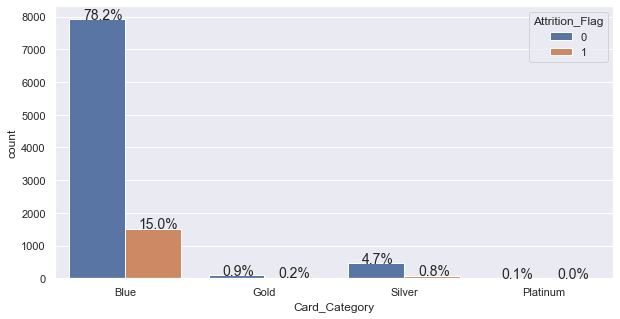

In [73]:
perc_on_bar(df.Card_Category)

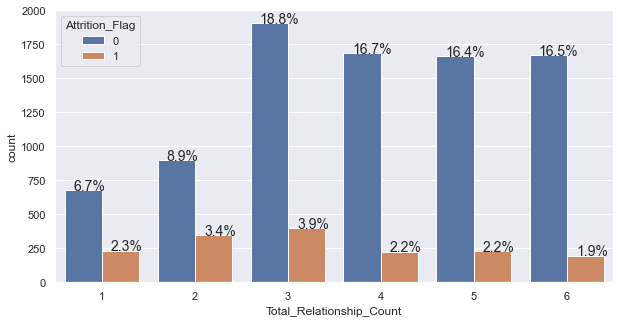

In [76]:
perc_on_bar(df.Total_Relationship_Count)

*Observations*
- Slightly more females than males with females having a larger portion of the attrition target
- Dependent count has a rise in the middle at 2 and 3 with the attrition target following
- graduate is the biggest amount and also the highest percentage of attrition
- majority are married  but the attrition is farily even between married and single
- Less than 40K has the  highest attrition
- Blue is the highest card category with the highest percentage of attrition
- In total relationship count category 3 is the highest and the percentage of attrition seems to follow the proportion of the category


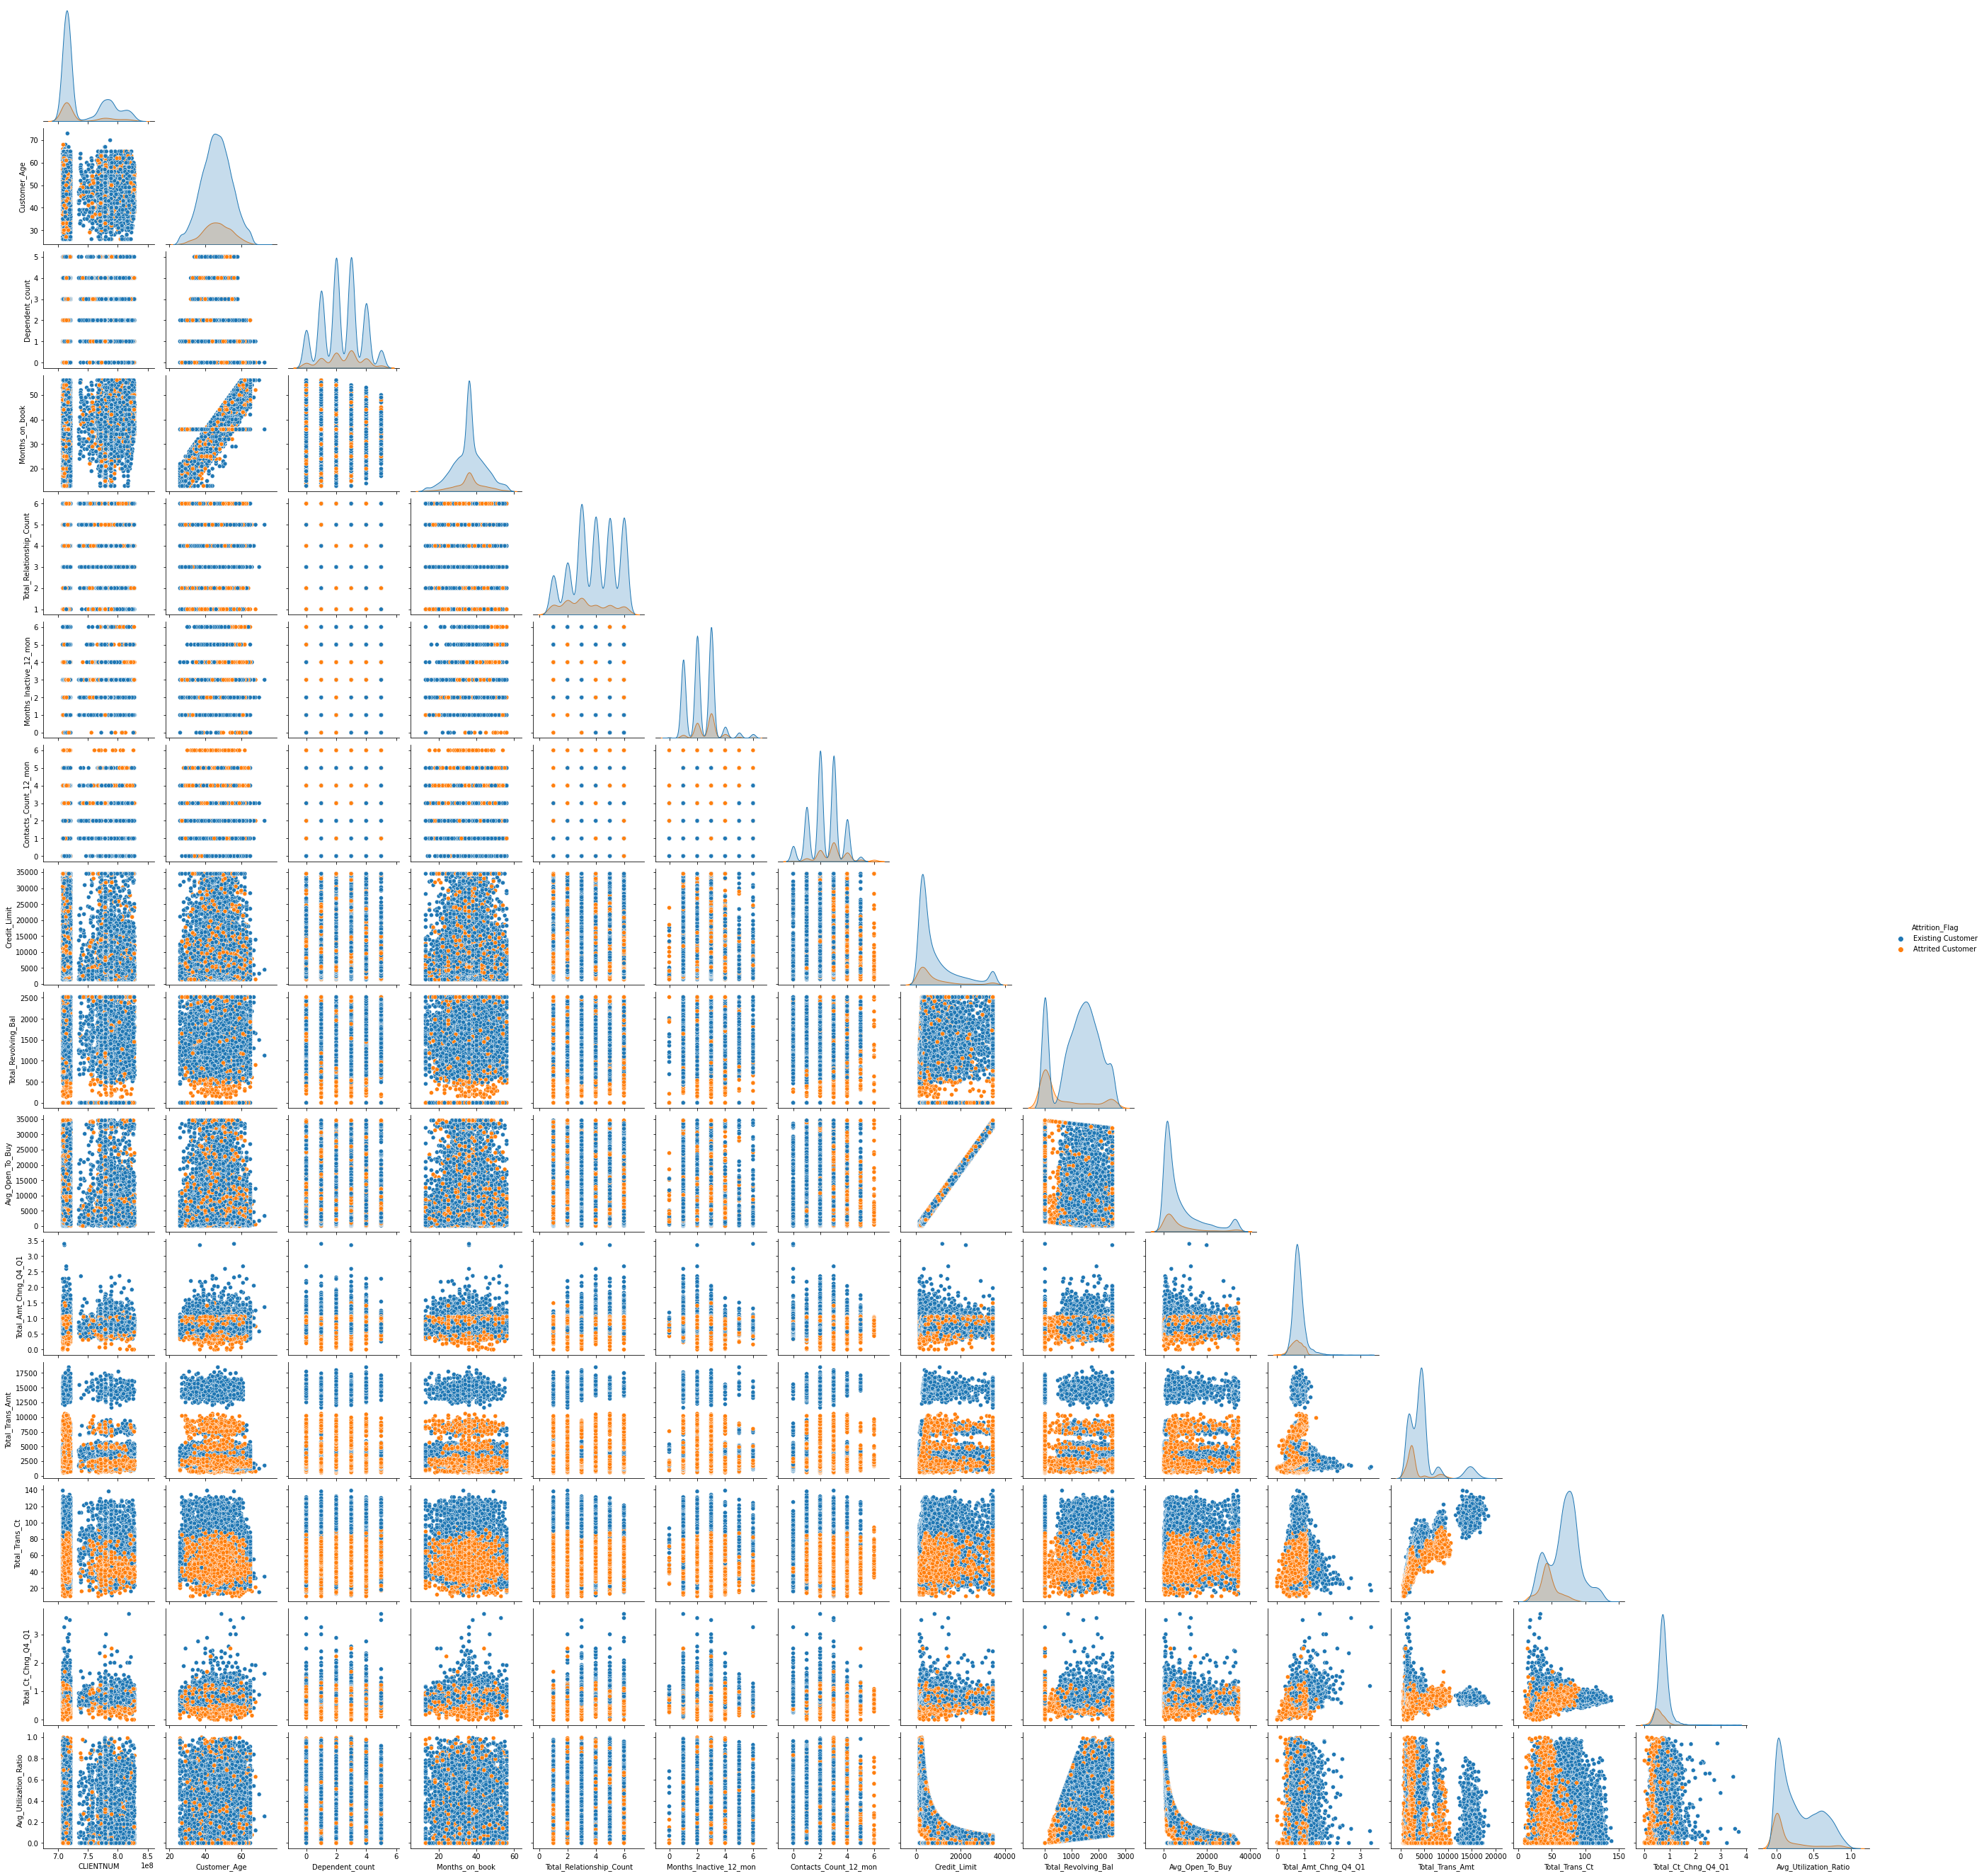

In [189]:
sns.pairplot(data=data,hue='Attrition_Flag', corner=True)

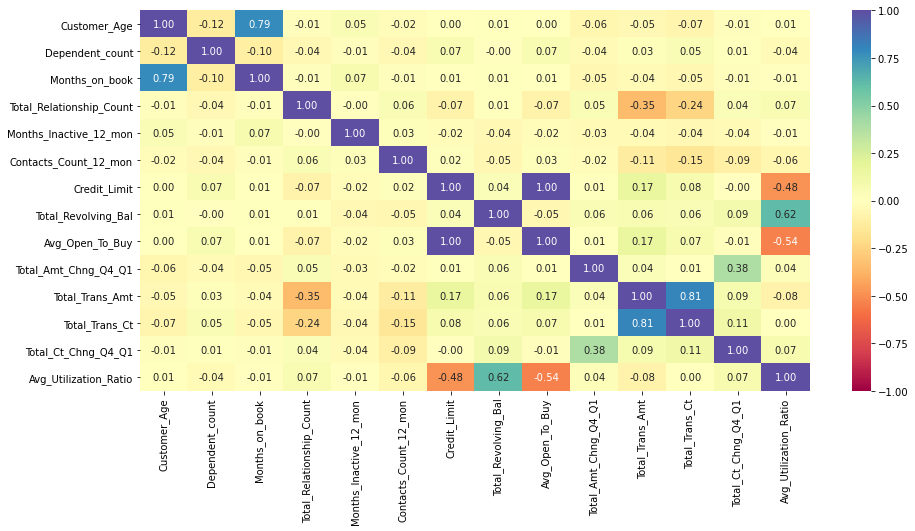

In [188]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

*Observations*
- Strong POSITIVE correlations between Total revolving balance and avg utilization ratio
- Strong NEGATIVE correlations between Average utilization ration and credit limit and avg open to buy.  This makes sense if the ration uses the other two variables in it's formula
- Slight negative correlation between total trans amt and totol relationship count
- Expected corelation between Customer age and months on book.  
- Strong correlation between Total Trans amt and Total trans ct

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  int64   
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  object  
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   object  
 6   Income_Category           10127 non-null  object  
 7   Card_Category             10127 non-null  object  
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

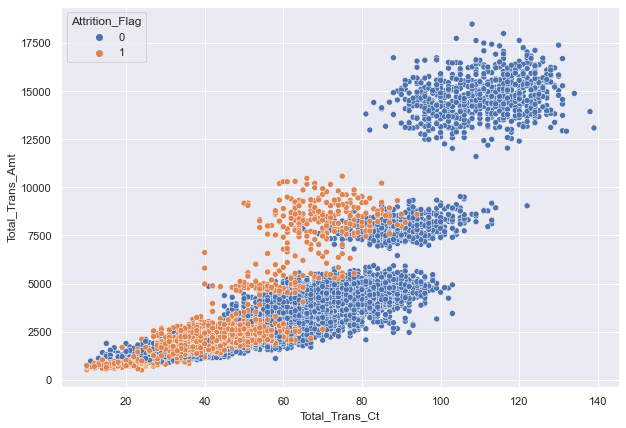

In [164]:
sns.scatterplot(y="Total_Trans_Amt", x="Total_Trans_Ct", hue="Attrition_Flag", data=df)

In [172]:
dfI.head()

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

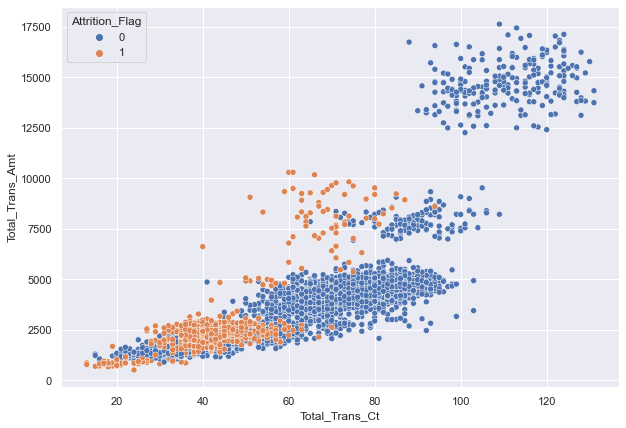

In [174]:
#dfI = df[df['Income_Category'] =="Less than $40K"]
sns.scatterplot(y="Total_Trans_Amt", x="Total_Trans_Ct", hue="Attrition_Flag", data=df[df['Income_Category'] =="Less than $40K"])

*Observation*  Less attrition for customers with higher total transactions and higher ammounts.  It also seems more pronouned when you only look at those with less than 40K income

<AxesSubplot:xlabel='Income_Category', ylabel='Avg_Utilization_Ratio'>

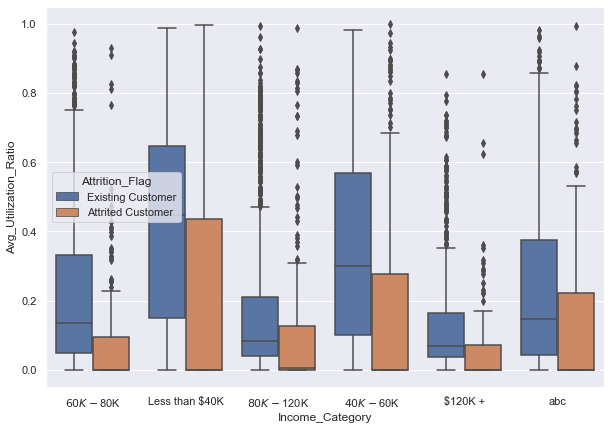

In [185]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Income_Category", data=data, hue="Attrition_Flag", orient="vertical")

<AxesSubplot:xlabel='Income_Category', ylabel='Total_Trans_Ct'>

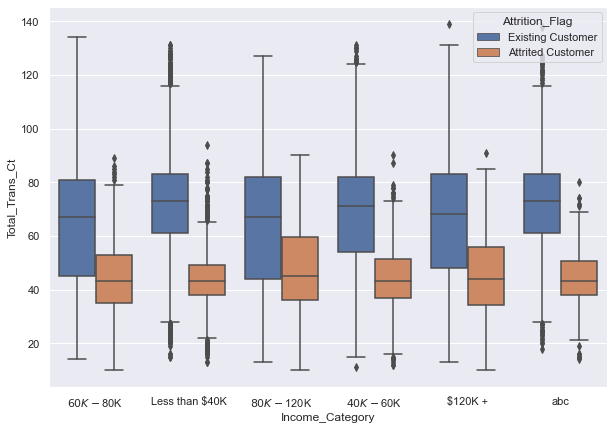

In [186]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Total_Trans_Ct", x="Income_Category", data=data, hue="Attrition_Flag", orient="vertical")

<AxesSubplot:xlabel='Marital_Status', ylabel='Avg_Utilization_Ratio'>

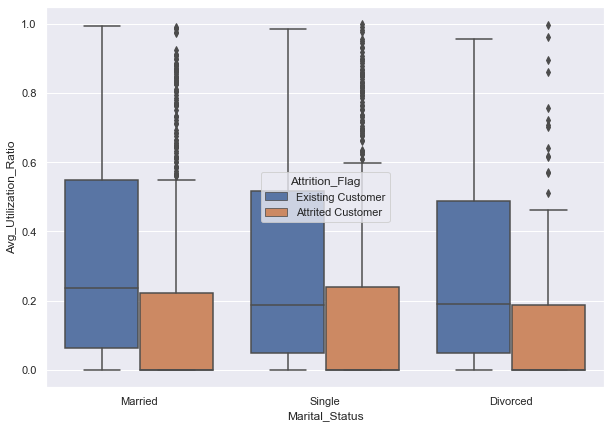

In [187]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(y="Avg_Utilization_Ratio", x="Marital_Status", data=data, hue="Attrition_Flag", orient="vertical")

In [188]:
df1 = df.copy()

In [189]:
df1[ 'Income_Category'] = df1[ 'Income_Category'].replace({ 'abc': np.NaN })


In [190]:
df1['Attrition_Flag'] = df1[ 'Attrition_Flag'].astype('category')
df1['Education_Level'] = df1[ 'Education_Level'].astype('category')
df1['Marital_Status'] = df1[ 'Marital_Status'].astype('category')
df1['Gender'] = df1[ 'Gender'].astype('category')
df1['Income_Category'] = df1[ 'Income_Category'].astype('category')
df1['Card_Category'] = df1[ 'Card_Category'].astype('category')


In [191]:
print(df1['Attrition_Flag'].value_counts())

0    8500
1    1627
Name: Attrition_Flag, dtype: int64


In [192]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

In [193]:
imputer = KNNImputer(n_neighbors=5)

In [194]:
#Making a list of all catrgorical variables 
nan_col=['Income_Category',
            'Marital_Status',
            'Education_Level']

#Printing number of count of each unique value in each column
for column in nan_col:
    print(df1[column].value_counts())
    print('-'*50)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------


In [195]:
impute_cols = ['Income_Category', "Marital_Status", "Education_Level"]

In [196]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Income_Category = {"Less than $40K": 0,
        "$40K - $60K": 1,
        "$80K - $120K":2,
        "$60K - $80K ": 3,
        "$120K +": 4}
df1['Income_Category'] =df1['Income_Category'].map(Income_Category)
Marital_Status= {"Married": 0,
        "Single": 1,
        "Divorced":2,}
df1['Marital_Status'] =df1['Marital_Status'].map(Marital_Status)
Education_Level= {"Uneducated": 0,
        "High School": 1,
        "College":2,
        "Graduate": 3,
        "Post-Graduate": 4,
        "Doctoraate":5}
df1['Education_Level'] =df1['Education_Level'].map(Education_Level)


In [197]:
df1.head()

Attrition_Flag  Customer_Age Gender  Dependent_count  Education_Level  \
0              0            45      M                3              1.0   
1              0            49      F                5              3.0   
2              0            51      M                3              3.0   
3              0            40      F                4              1.0   
4              0            40      M                3              0.0   

  Marital_Status  Income_Category Card_Category  Months_on_book  \
0              0              NaN          Blue              39   
1              1              0.0          Blue              44   
2              0              2.0          Blue              36   
3            NaN              0.0          Blue              34   
4              0              NaN          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [216]:
df2=df1.copy()

In [217]:
X = df2.drop(["Attrition_Flag"], axis=1)
y = df2["Attrition_Flag"]

In [218]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [219]:
print("Number of rows and columns in train data =", X_train.shape)
print("Number of rows and columns in validation data =", X_val.shape)
print("Number of rows and columns in test data =", X_test.shape)

Number of rows and columns in train data = (6075, 19)
Number of rows and columns in validation data = (2026, 19)
Number of rows and columns in test data = (2026, 19)


In [220]:
# Fit and transform the train data
X_train[impute_cols] = imputer.fit_transform(X_train[impute_cols])

# Transform the train data
X_val[impute_cols] = imputer.fit_transform(X_val[impute_cols])

# Transform the test data
X_test[impute_cols] = imputer.transform(X_test[impute_cols])

In [221]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [222]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

In [223]:
#Making a list of all catrgorical variables 
#nan_col=['Income_Category',
#            'Marital_Status',
 #           'Education_Level']

#Printing number of count of each unique value in each column
#for column in nan_col:
#    print(X_train[column].value_counts())
#    print('-'*50)

In [224]:
inverse_mapping(Marital_Status, "Marital_Status" )
inverse_mapping(Income_Category, "Income_Category")
inverse_mapping(Education_Level, "Education_Level")

In [225]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         625
High School      519
College          450
Uneducated       331
Post-Graduate    101
Name: Education_Level, dtype: int64
******************************
Married     982
Single      888
Divorced    156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    843
$40K - $60K       628
$80K - $120K      419
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


In [210]:
#Making a list of all catrgorical variables 
nan_col=['Income_Category',
            'Marital_Status',
            'Education_Level']

#Printing number of count of each unique value in each column
for column in nan_col:
    print(df1[column].value_counts())
    print('-'*50)

0.0    3561
1.0    1790
2.0    1535
4.0     727
Name: Income_Category, dtype: int64
--------------------------------------------------
0    4687
1    3943
2     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
3.0    3128
1.0    2013
0.0    1487
2.0    1013
4.0     516
Name: Education_Level, dtype: int64
--------------------------------------------------


In [226]:
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [227]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


In [228]:
X_train = pd.get_dummies(X_train, drop_first=False)
X_val = pd.get_dummies(X_val, drop_first=False)
X_test = pd.get_dummies(X_test, drop_first=False)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 32) (2026, 32) (2026, 32)


In [229]:
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                      0
Dependent_count                   0
Months_on_book                    0
Total_Relationship_Count          0
Months_Inactive_12_mon            0
Contacts_Count_12_mon             0
Credit_Limit                      0
Total_Revolving_Bal               0
Avg_Open_To_Buy                   0
Total_Amt_Chng_Q4_Q1              0
Total_Trans_Amt                   0
Total_Trans_Ct                    0
Total_Ct_Chng_Q4_Q1               0
Avg_Utilization_Ratio             0
Gender_F                          0
Gender_M                          0
Education_Level_College           0
Education_Level_Graduate          0
Education_Level_High School       0
Education_Level_Post-Graduate     0
Education_Level_Uneducated        0
Marital_Status_Divorced           0
Marital_Status_Married            0
Marital_Status_Single             0
Income_Category_$120K +           0
Income_Category_$40K - $60K       0
Income_Category_$80K - $120K      0
Income_Category_Less than $4

In [230]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [231]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    pred_val = model.predict(X_val)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    val_acc = model.score(X_val,y_val )
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    val_recall = metrics.recall_score(y_val,pred_val )
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    val_precision = metrics.precision_score(y_val,pred_val )
    #F1 scor of the model
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    val_f1 = f1_score(y_val,pred_val )
    
    score_list.extend((train_acc,test_acc, val_acc, train_recall,test_recall,val_recall,train_precision,test_precision,val_precision, train_f1, test_f1, val_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("Precision on validation set : ",metrics.recall_score(y_val,pred_val))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
        print("F1 on validation set : ",metrics.f1_score(y_val,pred_val))
    
    return score_list # returning the list with train and test scores

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will renounce their credit card but does not -loss of resources
2. Predicting a customer will not renounce their credit card but does -Loss of opportunity

#### Which case is more important? 
* Predicting that customer will not renounce thier credit card but he does i.e. losing on a potential source of income for the bank because that customer will not be targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* The Bank wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV**

- `Stratified K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.
- We will then perform the same using both under sampling and over sampling and choose the best results.

**Performance Target Metrics**
- Recall will be the main focus for the model and it's target performance metric is > .95
- Precision and accuracy must be >.70 on the final model.

In [232]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 78.9947671376243
Random forest: 73.25536368393512
GBM: 82.06698063840922
Adaboost: 81.7577184720042
Xgboost: 86.06174777603349
dtree: 78.27838827838826

Validation Performance:

Bagging: 0.7975460122699386
Random forest: 0.7883435582822086
GBM: 0.8619631901840491
Adaboost: 0.8558282208588958
Xgboost: 0.8773006134969326
dtree: 0.8128834355828221


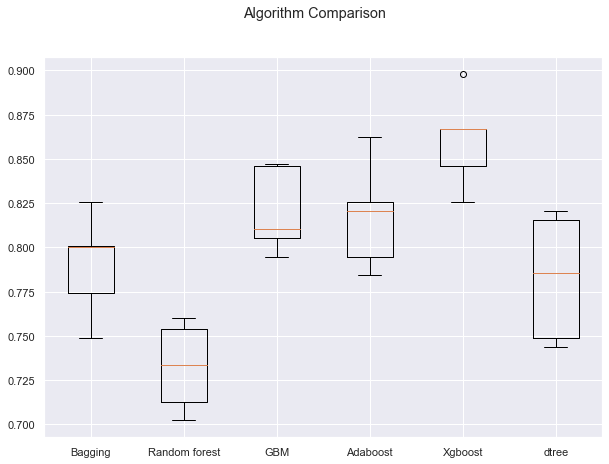

In [233]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

-  We can see that Xgboost followed by adaboost and Gradientboost have the highest cross-validated recall.  
- Xgboost shows  two outliers  with one for gradient boost
- all three seem to generalize well but lets try tuning them to gain performance.

#### XGBoost tuned for random search

In [65]:
%%time

# defining model
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':sp_randint(10, 110),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.roc_auc_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=xgb_tuned, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'gamma': 5, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 109, 'reg_lambda': 10, 'scale_pos_weight': 10, 'subsample': 0.8} with CV score=0.9547059202634779:
Wall time: 14.8 s


I chose ROC_AUC for scoring metric as it gave the best results.  It didn't affect the recall significantly but greatly increased the precision.

In [66]:
# building model with best parameters
xgb_tuned = XGBClassifier(
    random_state=1,
    n_estimators=109,
    scale_pos_weight=10,
    gamma=5,
    subsample=0.9,
    learning_rate=0.2,
    eval_metric="logloss",
    max_depth=4,
    reg_lambda=10,
)
# Fit the model on training data
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=109, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=10,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

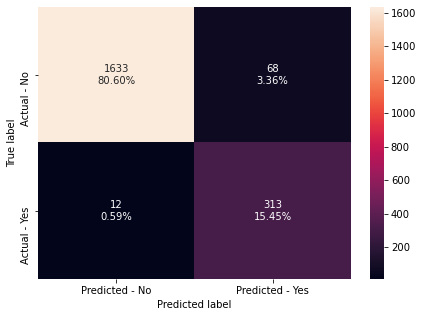

In [67]:
make_confusion_matrix(xgb_tuned,y_test)

In [68]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9751440329218107
Accuracy on test set :  0.9605133267522211
Accuracy on validation set :  0.9624876604146101
Recall on training set :  1.0
Recall on test set :  0.963076923076923
Recall on validation set :  0.9785276073619632
Precision on training set :  0.8660159716060337
Precision on test set :  0.821522309711286
Precision on validation set :  0.9785276073619632
F1 on training set :  0.9281978126485972
F1 on test set :  0.8866855524079319
F1 on validation set :  0.8935574229691876


Recall Precision And Accuracy are fitting nicely test set as well as the validation set.  All  meet our performance metrics

ADAboost tuned

In [69]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": sp_randint(10, 110),
    "learning_rate":sp_randint (0.1, 2)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(ada_tuned.best_params_,ada_tuned.best_score_))

Best parameters are {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1, 'n_estimators': 57} with CV score=0.8616588173731031:
Wall time: 12.8 s


In [70]:
# building model with best parameters
ada_tuned = AdaBoostClassifier(
    n_estimators= 57, 
    learning_rate= 1, 
    base_estimator=DecisionTreeClassifier(max_depth=2)
 
)
# Fit the model on training data
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=57)

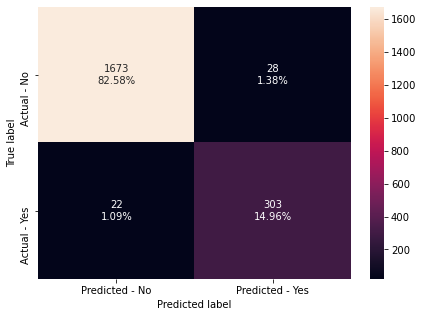

In [71]:
make_confusion_matrix(ada_tuned,y_test)

In [72]:
ada_tuned_score=get_metrics_score(ada_tuned)

Accuracy on training set :  0.9873251028806584
Accuracy on test set :  0.9753208292201382
Accuracy on validation set :  0.9629812438302073
Recall on training set :  0.9590163934426229
Recall on test set :  0.9323076923076923
Recall on validation set :  0.8588957055214724
Precision on training set :  0.9619732785200411
Precision on test set :  0.9154078549848943
Precision on validation set :  0.8588957055214724
F1 on training set :  0.9604925602873268
F1 on test set :  0.923780487804878
F1 on validation set :  0.8818897637795275


While this model is giving us the best results for precision its recall is still below our target

#### GBM tuned

In [73]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={"n_estimators": sp_randint(300, 600),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8, .9, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gmb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gmb_tuned.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(gmb_tuned.best_params_,gmb_tuned.best_score_))

Best parameters are {'max_features': 0.7, 'n_estimators': 322, 'subsample': 0.9} with CV score=0.8637100994243851:
Wall time: 2min 12s


In [74]:
# building model with best parameters
gmb_tuned = GradientBoostingClassifier(
    subsample= 0.9, 
    n_estimators= 322, 
    max_features=0.7)
 

# Fit the model on training data
gmb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_features=0.7, n_estimators=322, subsample=0.9)

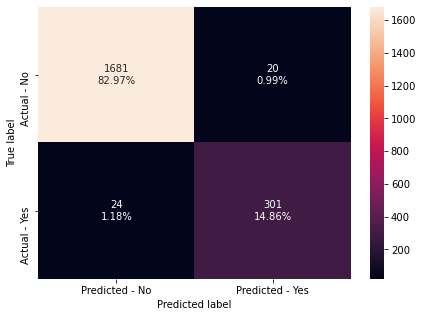

In [75]:
make_confusion_matrix(gmb_tuned,y_test)

In [76]:
gmb_tuned_score=get_metrics_score(gmb_tuned)

Accuracy on training set :  0.9929218106995885
Accuracy on test set :  0.9782823297137216
Accuracy on validation set :  0.9723593287265548
Recall on training set :  0.9672131147540983
Recall on test set :  0.9261538461538461
Recall on validation set :  0.8926380368098159
Precision on training set :  0.9884816753926702
Precision on test set :  0.9376947040498442
Precision on validation set :  0.8926380368098159
F1 on training set :  0.9777317452097358
F1 on test set :  0.9318885448916409
F1 on validation set :  0.9122257053291536


Gradient boosting tuned with random search is doing betting than adaboost but is still not meeting performance standards.  while it is generalizing very well the recall on the test set is below our performance metric

In [115]:
models = []  # Empty list to store all the models

# Appending models into the list
xgb_tuned = models.append(("XGB Tuned", XGBClassifier(
    random_state=1,
    n_estimators=109,
    scale_pos_weight=10,
    gamma=5,
    subsample=0.9,
    learning_rate=0.2,
    eval_metric="logloss",
    max_depth=4,
    reg_lambda=10,)))
ada_tuned = models.append(("Adaboost Tuned", AdaBoostClassifier(
    n_estimators= 57, 
    learning_rate= 1, 
    base_estimator=DecisionTreeClassifier(max_depth=2)
 )))
gmb_tuned = models.append(("GBM Tuned", GradientBoostingClassifier(
     subsample= 0.9, 
    n_estimators= 322, 
    max_features=0.7)))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

XGB Tuned: 93.9534275248561
Adaboost Tuned: 85.4458398744113
GBM Tuned: 85.85661957090528

Validation Performance:

XGB Tuned: 0.9785276073619632
Adaboost Tuned: 0.8588957055214724
GBM Tuned: 0.8957055214723927


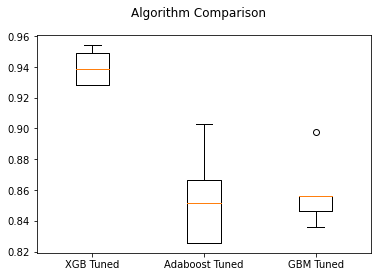

In [116]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

So far XGB Tuned model is showing some of the best performance.  It seems to generalize pretty well and has the Highest recall of the three tuned models.  Let's try these three models with over and under sampling

#### Oversampling the data

In [79]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 32)
After UpSampling, the shape of train_y: (10198,) 



In [80]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
# since the test train and val have changed names I had to tweak this function a bit accordingly
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train tests
    pred_train = model.predict(X_train_over)
    pred_test = model.predict(X_test)
    pred_val = model.predict(X_val)
    
    #Accuracy of the model
    train_acc = model.score(X_train_over,y_train_over)
    test_acc = model.score(X_test,y_test)
    val_acc = model.score(X_val,y_val )
    #Recall of the model
    train_recall = metrics.recall_score(y_train_over,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    val_recall = metrics.recall_score(y_val,pred_val )
    #Precision of the model
    train_precision = metrics.precision_score(y_train_over,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    val_precision = metrics.precision_score(y_val,pred_val )
    #F1 scor of the model
    train_f1 = f1_score(y_train_over,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    val_f1 = f1_score(y_val,pred_val )
    
    score_list.extend((train_acc,test_acc, val_acc, train_recall,test_recall,val_recall,train_precision,test_precision,val_precision, train_f1, test_f1, val_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train_over,y_train_over))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
        print("Recall on training set : ",metrics.recall_score(y_train_over,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
        print("Precision on training set : ",metrics.precision_score(y_train_over,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("Precision on validation set : ",metrics.recall_score(y_val,pred_val))
        print("F1 on training set : ",metrics.f1_score(y_train_over,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
        print("F1 on validation set : ",metrics.f1_score(y_val,pred_val))
    
    return score_list # returning the list with train and test scores

In [81]:
# I had to switch to a different function for performance metrics after over/undersampling
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [82]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [100]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':sp_randint(20, 100),
            'scale_pos_weight':sp_randint(1, 25),
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10,15,20]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.roc_auc_score)

#Calling RandomizedSearchCV
xgb_tuned_over = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned_over.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned_over.best_params_,xgb_tuned_over.best_score_))

Best parameters are {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 86, 'reg_lambda': 5, 'scale_pos_weight': 3, 'subsample': 0.3} with CV score=0.9570543978140815:
Wall time: 20 s


In [101]:
# building model with best parameters
xgb_tuned_over = XGBClassifier(
    subsample= 0.3,
    scale_pos_weight= 3,
    reg_lambda= 5,
    n_estimators= 86,
    max_depth= 3, 
    learning_rate= 0.2, 
    gamma= 5,
    eval_metric="logloss"
)
# Fit the model on training data
xgb_tuned_over.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=86, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=3, subsample=0.3, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [102]:
get_metrics_score(xgb_tuned_over)

Accuracy on training set :  0.9749950970778584
Accuracy on test set :  0.9486673247778875
Accuracy on validation set :  0.9501480750246791
Recall on training set :  0.994508727201412
Recall on test set :  0.9661538461538461
Recall on validation set :  0.950920245398773
Precision on training set :  0.9571536428841072
Precision on test set :  0.7714987714987716
Precision on validation set :  0.950920245398773
F1 on training set :  0.9754736943349043
F1 on test set :  0.8579234972677596
F1 on validation set :  0.8599167822468792


[0.9749950970778584,
 0.9486673247778875,
 0.9501480750246791,
 0.994508727201412,
 0.9661538461538461,
 0.950920245398773,
 0.9571536428841072,
 0.7714987714987716,
 0.7848101265822784,
 0.9754736943349043,
 0.8579234972677596,
 0.8599167822468792]

Recall Precision and accuracy all meet our targets.  This models seems to generalize well but the tuned XGB had better results without oversampling. 

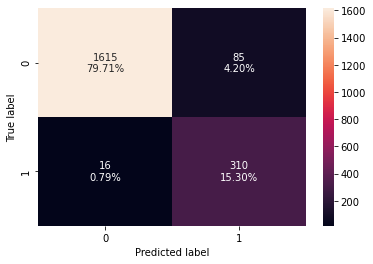

In [103]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_over, X_val, y_val)

In [104]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": sp_randint(10, 200),
    "learning_rate":np.arange(0.1,2,0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned_over = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned_over.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(ada_tuned_over.best_params_,ada_tuned_over.best_score_))

Best parameters are {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.6, 'n_estimators': 156} with CV score=0.9296068810252265:
Wall time: 1min 9s


In [105]:
# building model with best parameters
ada_tuned_over = AdaBoostClassifier(
    n_estimators= 156, 
    learning_rate= 0.6, 
    base_estimator=DecisionTreeClassifier(max_depth=3)
 
)
# Fit the model on training data
ada_tuned_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.6, n_estimators=156)

In [106]:
get_metrics_score(ada_tuned_over)

Accuracy on training set :  1.0
Accuracy on test set :  0.9693978282329714
Accuracy on validation set :  0.9654491609081934
Recall on training set :  1.0
Recall on test set :  0.92
Recall on validation set :  0.8926380368098159
Precision on training set :  1.0
Precision on test set :  0.8925373134328358
Precision on validation set :  0.8926380368098159
F1 on training set :  1.0
F1 on test set :  0.906060606060606
F1 on validation set :  0.8926380368098158


[1.0,
 0.9693978282329714,
 0.9654491609081934,
 1.0,
 0.92,
 0.8926380368098159,
 1.0,
 0.8925373134328358,
 0.8926380368098159,
 1.0,
 0.906060606060606,
 0.8926380368098158]

Ada Boost with over sampling does not meet our performance metric for recall.  

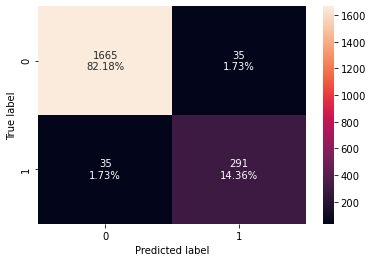

In [108]:
# creating confusion matrix
confusion_matrix_sklearn(ada_tuned_over, X_val, y_val)

In [109]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={"n_estimators": sp_randint(200, 500),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8, .9, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gmb_tuned_over = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gmb_tuned_over.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(gmb_tuned_over.best_params_,gmb_tuned_over.best_score_))

Best parameters are {'max_features': 0.9, 'n_estimators': 215, 'subsample': 0.8} with CV score=0.9325486347630318:
Wall time: 2min 54s


In [110]:
# building model with best parameters
gmb_tuned_over = GradientBoostingClassifier(
    subsample= 0.8, 
    n_estimators= 215, 
    max_features=0.9)
 

# Fit the model on training data
gmb_tuned_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=0.9, n_estimators=215, subsample=0.8)

In [111]:
get_metrics_score(gmb_tuned_over)

Accuracy on training set :  0.9887232790743283
Accuracy on test set :  0.9723593287265548
Accuracy on validation set :  0.9703849950641659
Recall on training set :  0.9884291037458325
Recall on test set :  0.9323076923076923
Recall on validation set :  0.911042944785276
Precision on training set :  0.989010989010989
Precision on test set :  0.8991097922848664
Precision on validation set :  0.911042944785276
F1 on training set :  0.988719960765081
F1 on test set :  0.9154078549848943
F1 on validation set :  0.9082568807339448


[0.9887232790743283,
 0.9723593287265548,
 0.9703849950641659,
 0.9884291037458325,
 0.9323076923076923,
 0.911042944785276,
 0.989010989010989,
 0.8991097922848664,
 0.9054878048780488,
 0.988719960765081,
 0.9154078549848943,
 0.9082568807339448]

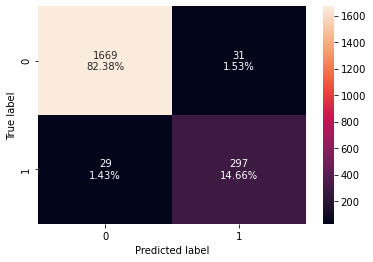

In [112]:
# creating confusion matrix
confusion_matrix_sklearn(gmb_tuned_over, X_val, y_val)

adaboost with undersampling does not our target metrics.

In [117]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("XGB Tuned Oversample", XGBClassifier(
    subsample= 0.3,
    scale_pos_weight= 3,
    reg_lambda= 5,
    n_estimators= 86,
    max_depth= 3, 
    learning_rate= 0.2, 
    gamma= 5,
    eval_metric="logloss")))
models.append(("Adaboost Tuned Oversample", AdaBoostClassifier(
    n_estimators= 156, 
    learning_rate= 0.6, 
    base_estimator=DecisionTreeClassifier(max_depth=3))))
gmb_tuned = models.append(("GBM Tuned Oversampled", GradientBoostingClassifier(
    subsample= 0.8, 
    n_estimators= 215, 
    max_features=0.9)))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

XGB Tuned Oversample: 98.78412130308455
Adaboost Tuned Oversample: 97.54861552079123
GBM Tuned Oversampled: 97.74469395216379

Validation Performance:

XGB Tuned Oversample: 0.950920245398773
Adaboost Tuned Oversample: 0.8926380368098159
GBM Tuned Oversampled: 0.901840490797546


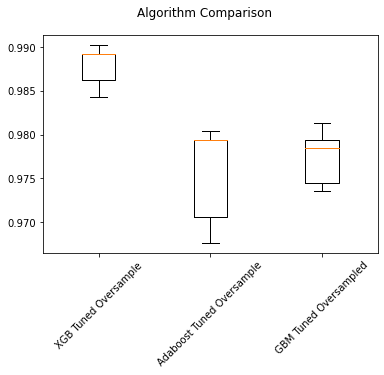

In [118]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names, rotation = 45)

plt.show()

XGB Tuned with oversampling had the best performance of the three but the XGB tuned without oversampling had slightly better results.

#### Under Sampling

In [119]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 32)
After Under Sampling, the shape of train_y: (1952,) 



In [120]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={"base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": sp_randint(1, 500),
    "learning_rate":np.arange(0.1,2,0.1)}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned_under.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(ada_tuned_under.best_params_,ada_tuned_under.best_score_))

Best parameters are {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.6, 'n_estimators': 403} with CV score=0.96003663003663:
Wall time: 41.7 s


In [123]:
# building model with best parameters
ada_tuned_under = AdaBoostClassifier(
    n_estimators= 403, 
    learning_rate= .6, 
    base_estimator=DecisionTreeClassifier(max_depth=3)
 
)
# Fit the model on training data
ada_tuned_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.6, n_estimators=403)

In [125]:
get_metrics_score(ada_tuned_under)

Accuracy on training set :  0.968719356736615
Accuracy on test set :  0.9402764067127345
Accuracy on validation set :  0.941263573543929
Recall on training set :  0.9854873504608747
Recall on test set :  0.9723076923076923
Recall on validation set :  0.9662576687116564
Precision on training set :  0.9535104364326376
Precision on test set :  0.7383177570093458
Precision on validation set :  0.9662576687116564
F1 on training set :  0.9692352203684057
F1 on test set :  0.8393094289508632
F1 on validation set :  0.8411214953271027


[0.968719356736615,
 0.9402764067127345,
 0.941263573543929,
 0.9854873504608747,
 0.9723076923076923,
 0.9662576687116564,
 0.9535104364326376,
 0.7383177570093458,
 0.7446808510638298,
 0.9692352203684057,
 0.8393094289508632,
 0.8411214953271027]

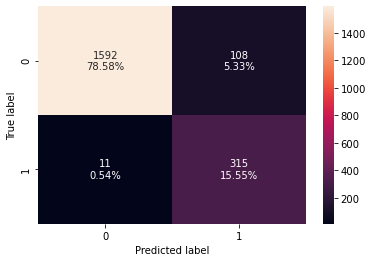

In [126]:
# creating confusion matrix
confusion_matrix_sklearn(ada_tuned_under, X_val, y_val)

ADAboost with under sampling also meets our target metrics.  It's recall is slightly higher with oversampling and it's precision is slightly lower.  

In [124]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':sp_randint(50, 250),
            'scale_pos_weight':[2,5,10.20,40],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.roc_auc_score)

#Calling RandomizedSearchCV
xgb_tuned_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned_under.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned_under.best_params_,xgb_tuned_under.best_score_))

Best parameters are {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 246, 'reg_lambda': 5, 'scale_pos_weight': 5, 'subsample': 0.8} with CV score=0.9421193092621666:
Wall time: 16.5 s


This is one of the few times were a model performed better when I changed the scoring metric from recall to ROC AUC.  

In [127]:
# building model with best parameters
xgb_tuned_under = XGBClassifier(
    subsample= 0.8,
    scale_pos_weight= 5,
    reg_lambda= 5,
    n_estimators= 246,
    max_depth= 4, 
    learning_rate= 0.1, 
    gamma= 1,
    eval_metric="logloss"
)
# Fit the model on training data
xgb_tuned_under.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=246, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=5, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [128]:
get_metrics_score(xgb_tuned_under)

Accuracy on training set :  0.9611688566385566
Accuracy on test set :  0.918558736426456
Accuracy on validation set :  0.9279368213228035
Recall on training set :  0.9935281427730928
Recall on test set :  0.9846153846153847
Recall on validation set :  0.99079754601227
Precision on training set :  0.933136857616504
Precision on test set :  0.6666666666666666
Precision on validation set :  0.99079754601227
F1 on training set :  0.9623860182370821
F1 on test set :  0.7950310559006212
F1 on validation set :  0.8156565656565657


[0.9611688566385566,
 0.918558736426456,
 0.9279368213228035,
 0.9935281427730928,
 0.9846153846153847,
 0.99079754601227,
 0.933136857616504,
 0.6666666666666666,
 0.6931330472103004,
 0.9623860182370821,
 0.7950310559006212,
 0.8156565656565657]

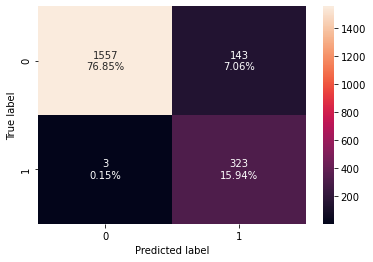

In [129]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_under, X_val, y_val)

While having some of the best recall so far, XGB suffers from precsion and does not meet our target critera.  

In [122]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid={"n_estimators": sp_randint(300, 500),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8, .9, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gmb_tuned_under = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gmb_tuned_under.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gmb_tuned_under.best_params_,gmb_tuned_under.best_score_))

Best parameters are {'max_features': 0.8, 'n_estimators': 404, 'subsample': 1} with CV score=0.9590214547357405:
Wall time: 44.9 s


In [130]:
# building model with best parameters
gmb_tuned_under = GradientBoostingClassifier(
    subsample= 0.8, 
    n_estimators= 404, 
    max_features=0.8)
 

# Fit the model on training data
gmb_tuned_under.fit(X_train_un, y_train_un)

GradientBoostingClassifier(max_features=0.8, n_estimators=404, subsample=0.8)

In [131]:
get_metrics_score(gmb_tuned_under)

Accuracy on training set :  0.9706805255932536
Accuracy on test set :  0.9496544916090819
Accuracy on validation set :  0.9486673247778875
Recall on training set :  0.9854873504608747
Recall on test set :  0.9723076923076923
Recall on validation set :  0.9723926380368099
Precision on training set :  0.9571428571428572
Precision on test set :  0.7726161369193154
Precision on validation set :  0.9723926380368099
F1 on training set :  0.9711083196444101
F1 on test set :  0.8610354223433243
F1 on validation set :  0.8590785907859079


[0.9706805255932536,
 0.9496544916090819,
 0.9486673247778875,
 0.9854873504608747,
 0.9723076923076923,
 0.9723926380368099,
 0.9571428571428572,
 0.7726161369193154,
 0.7694174757281553,
 0.9711083196444101,
 0.8610354223433243,
 0.8590785907859079]

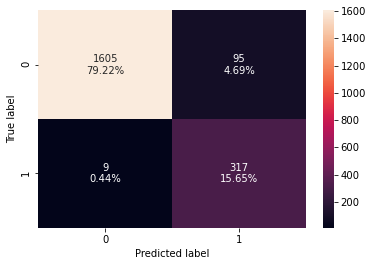

In [132]:
# creating confusion matrix
confusion_matrix_sklearn(gmb_tuned_under, X_val, y_val)

I think this is one of the best models so far.  It meets all the critera and generalizes pretty well.  

In [133]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("XGB Tuned Oversample", XGBClassifier(
    subsample= 0.8,
    scale_pos_weight= 5,
    reg_lambda= 5,
    n_estimators= 246,
    max_depth= 4, 
    learning_rate= 0.1, 
    gamma= 1,
    eval_metric="logloss")))
models.append(("Adaboost Tuned Oversample", AdaBoostClassifier(
    n_estimators= 403, 
    learning_rate= .6, 
    base_estimator=DecisionTreeClassifier(max_depth=3))))
models.append(("GBM Tuned Undersampled", GradientBoostingClassifier(
    subsample= 0.8, 
    n_estimators= 404, 
    max_features=0.8)))


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

XGB Tuned Oversample: 99.19590525120746
Adaboost Tuned Oversample: 97.86236025322788
GBM Tuned Undersampled: 97.99967288191036

Validation Performance:

XGB Tuned Oversample: 0.9601226993865031
Adaboost Tuned Oversample: 0.8895705521472392
GBM Tuned Undersampled: 0.911042944785276


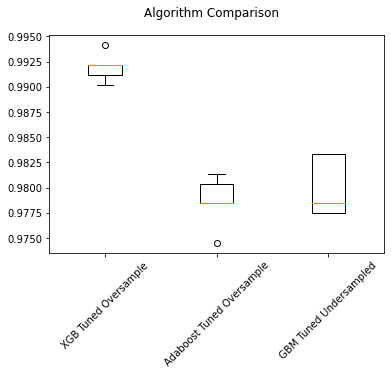

In [134]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names, rotation = 45)

plt.show()

While XGB tuned over has the highest recall it does not meet performance standards for precision and accuracy.  GBM Tuned under had the best overall performance and meets performance metrics.

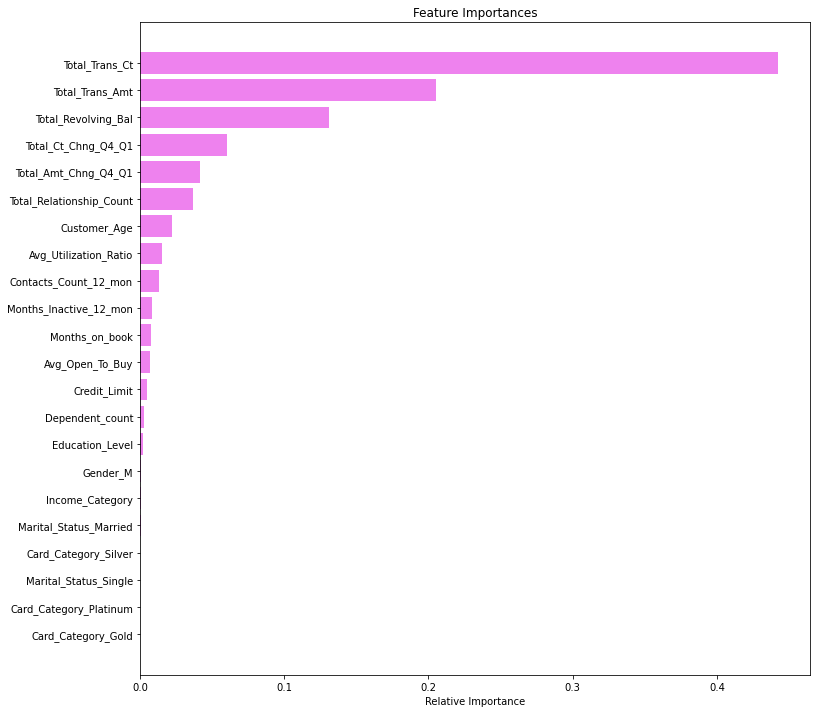

In [365]:
feature_names = X_train_un.columns
importances = gmb_tuned_under.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Pipelines for productionizing the model
- Now, we have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - how can we personalize the pipeline to perform different processing on different columns
- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [135]:
# creating a list of numerical variables
numerical_features = [
    "Customer_Age",
    "Dependent_count",
    "Months_on_book",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Credit_Limit",
    "Total_Revolving_Bal",
    "Avg_Open_To_Buy",
    "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Amt",
    "Total_Trans_Ct",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
    
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Gender", "Marital_Status", 'Education_Level', 'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


In [136]:
# Separating target variable and other variables
X = df2.drop(columns="Attrition_Flag")
Y = df2["Attrition_Flag"]

In [137]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [234]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GMB",
            GradientBoostingClassifier(
    subsample= 0.8, 
    n_estimators= 404, 
    max_features=0.8),
        ),
    ]
)
# Fit the model on training data
model.fit(X, y)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                            

*Conclusions*  As seen in the EDA Total Trans amount and count Are the largest contributing features of the model to predicting attrition.  The model chosen uses Gradient boosting classifier which was tuned using a randam search cross validation on oversampled data.  It's performance while testing indicated that it would have a false negative rate (customers not predicting to attrit but did) of only 0.44%.  With having such a high recall it did not sacrifice accuracy or precision in that it's false positive rate (customers who did not attrite but were predicted to do so) of 4.4%.  This will lead to a very accurate targeting of customers minimizing the lossed while keeping the costs of marketing low.  